# MKTHNUM Benchmarks

To solve the problem MKTHNUM by [Spoj](https://www.spoj.com/) are proposed two different solutions that use two different types of Segment Tree, one solution uses the Segment Tree with Persistence technique, and the second solution use a custom implementation of the Segment Tree, wherein each node is stored a Balanced Binary Tree with the element in the range $[L, R]$.

## Problem

Given an array of $N$ of different integer numbers, the algorithm needs to answer a sequence of queries
with the following format $Q(L, R, K)$ where $L$ and $R$ is the range $[L, R]$ where the algorithm needs to return the $Kth$ element in the range.


In particular, the query needs to be able to answer a question like "What would be the k-th number in a range $[i, j]$, if this the element of this
subarray was sorted?"

#### Example 

Consider an array like the array A = {1, 5, 2, 6, 3, 7, 4}. Where and query can ask to find the *3rd* number in the sorted segment from _[2, 5].

After sorting the elements in the range _[2, 5]_, we get the segment composed from the following element {2, 3, 5, 6} and the third number in the range is 5, and therefore the correct answer to the query is 5.

## Solution with a custom implementation of Segment Tree.

The basic idea to solve this problem is to store a Balanced Binary Tree in each node of the segment, the balanced binary tree help to maintain the element stored inside the segments.
An implementation is available on the Github repository [Competitive-Programming-and-Contests-VP-Solution](https://github.com/vincenzopalazzo/Competitive-Programming-and-Contests-VP-Solution).
However, the time complexity is not enough to solve the problem with the online Judge, and the C++ solution that gets a Time Limit Exceeded available at the following [link](https://www.spoj.com/status/MKTHNUM,macros1/).

To solve with success the problem with the online Judge we need to use Persistent Tree, and the solution is described in the next section.

## Solution with Persistent Segment Tree

Before introducing the solution, we need to introduce a limitation in the previous solution, that is on the Sorting element, in this problem, there isn't a present update query and this meant that the input array will not change during the execution of the algorithm. With this observation, we can say that is possible to sort the array before build the segment tree and it can help to improve the solution time of the previous solution.

The solution with Persistent Segment Tree uses this observation to make a simple remapping of them and build an incremental Persistent Segment Tree, and as the last step of the algorithm, we perform all the query of the problem on the Segment Tree, in the range of $[L, R]$ were in the case of Persistent Segment Tree is to perform a query in two instances of the Segment Tree, on is the instance in position L and the last one is the instance in position R. After that the algorithm performs a binary search to find the kth element in the range. The code solution is available on [Competitive-Programming-and-Contests-VP-Solution](https://github.com/vincenzopalazzo/Competitive-Programming-and-Contests-VP-Solution).

This solution is faster than the solution in the previous section because the time complexity is $\mathcal{O}(Q \log N)$ where the Q is the number of query and N is the size of the array, but on the other hand, the space complexity is more complex to calculate because the Persistent Segment Tree contains also a vector with the history of the data struct where the head element in these data structure can contain \log N new element. 

## Benchmark Discussion

To compare the solution two solution proposed in the previois section, is used a micro benchmarck library as Google Benckmark to compare the two solution during the exection of it. This section contains a complete discussion of the results.

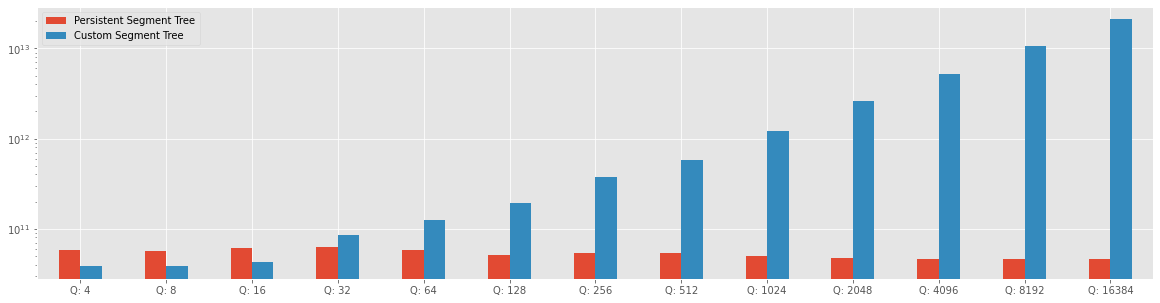

In [1]:
from core_chart import ( make_segment_tree_and_persistent_segmet_tree_benchmark_chart, 
make_segment_tree_and_persistent_segmet_tree_benchmark_table )

make_segment_tree_and_persistent_segmet_tree_benchmark_chart()

In [4]:
make_segment_tree_and_persistent_segmet_tree_benchmark_table()

,Persistent Segment Tree,Custom Segment Tree
Q: 4,57642648688.000916 ns,38966243126.99896 ns
Q: 8,55842193433.99309 ns,38115228559.99828 ns
Q: 16,61573267574.00005 ns,42337273312.99997 ns
Q: 32,62660775567.004745 ns,84876541783.0 ns
Q: 64,57592852565.00152 ns,125670119671.00006 ns
Q: 128,51162499106.00163 ns,193710662405.00113 ns
Q: 256,53811262555.00567 ns,377359894010.99866 ns
Q: 512,53680732222.00474 ns,580985333179.9987 ns
Q: 1024,49803293349.99988 ns,1225670039757.0002 ns
Q: 2048,46770501815.0009 ns,2639171862127.9995 ns
